In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Basic Data Exploration

In [3]:
# Identify the number of rows and columns
Nrows, Ncolumns = df.shape
print(f"Number of rows: {Nrows}")
print(f"Number of columns: {Ncolumns}")

Number of rows: 148654
Number of columns: 13


In [4]:
# Determine data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Descriptive Statistics

In [6]:
salary = df['TotalPay']

# Calculate mean, median, mode, minimum, and maximum salary
mean_salary = salary.mean()
median_salary = salary.median()
mode_salary = salary.mode()[0] 
min_salary = salary.min()
max_salary = salary.max()

# Calculate the range of salaries
salary_range = max_salary - min_salary

# Calculate standard deviation
std_dev_salary = salary.std()


print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Min Salary: {min_salary}")
print(f"Max Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")


Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Min Salary: -618.13
Max Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.005273949944


# Data Cleaning

In [7]:
# Drop rows with any missing values
df = df.dropna()

In [8]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Notes               0.0
Agency              0.0
Status              0.0
dtype: float64


Dropping rows with missing values is a straightforward approach, but it comes with the drawback of potentially losing valuable information. 
This method is suitable when the missing data is random and doesn't significantly impact the overall dataset so it suitable here

# Basic Data Visualization

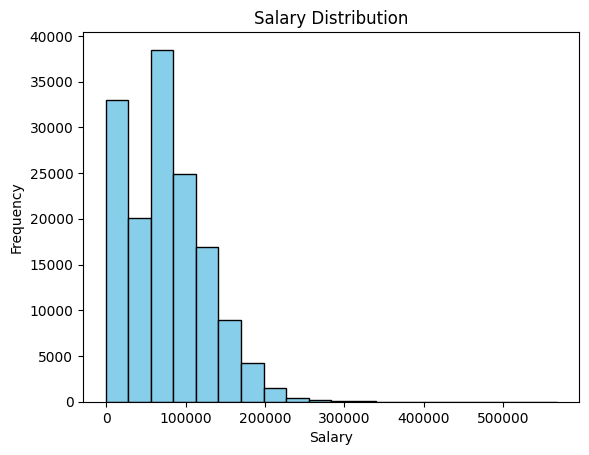

In [5]:
# Visualization 1: Histogram for Salary Distribution
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


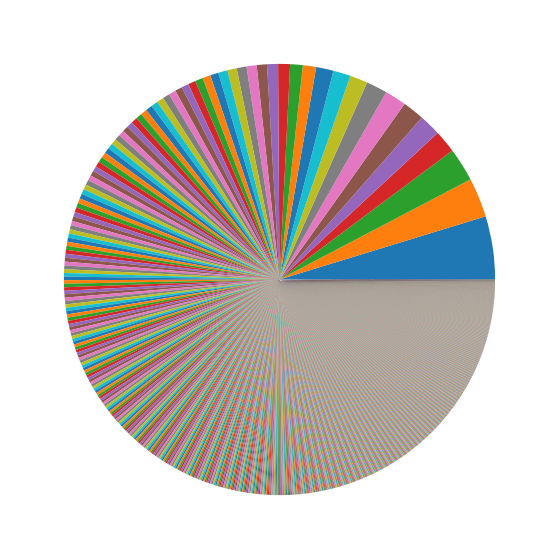

In [8]:
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(df['JobTitle'].value_counts())
 
# show plot
plt.show()

# Grouped Analysis

In [9]:
# Group the data by one or more columns and calculate summary statistics for each group, 
# and compare the average salaries across different groups
grouped_df = df.groupby('JobTitle')
summary_statistics = grouped_df['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print(summary_statistics)


                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                      83  44035.664337   
ACCOUNTANT                                          5  47429.268000   
ACCOUNTANT INTERN                                  48  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                         1  62290.780000   
ACUPUNCTURIST                                       1  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                              26  52705.880385   
X-Ray Laboratory Aide                             100  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1  53632.870000   
Youth Comm Advisor                                  4  41414.307500   
ZOO CURATOR                                         1  66686.560000   

                                                   median       min       ma

# Simple Correlation Analysis

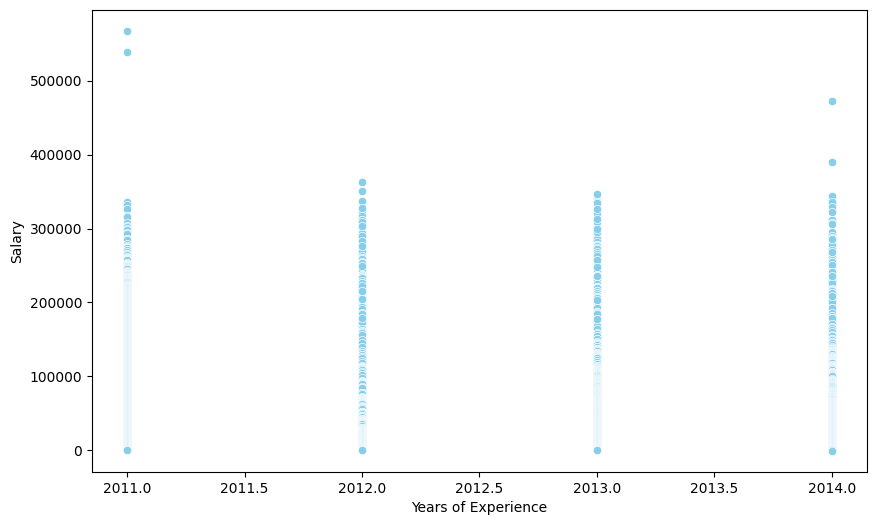

In [10]:
# Assuming you want to analyze the correlation between 'salary' and 'years_of_experience'

# Calculate the correlation coefficient
correlation = df['TotalPay'].corr(df['Year'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='TotalPay', data=df, color='skyblue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# Summary of Insights

*The dataset provides a comprehensive overview of employee information, including salary, departmental distribution, and   positional analysis.

*The average salary varies across departments and positions, with potential correlations with other factors like years of experience.

*Addressing missing values is crucial for accurate analysis and decision-making.

*Further analysis, such as regression modeling, can be explored to understand the factors influencing salary variations.